In [8]:
import pandas as pd
df = pd.read_csv('../../01_Data/04_Cleaned_Data/Cleaned_Data.csv',sep=',')
df

,age,job,marital,education,month,campaign,previous,poutcome,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,may,1,0,nonexistent,-36.4,4.857,5191.0,no
1,57,services,married,high.school,may,1,0,nonexistent,-36.4,4.857,5191.0,no
2,37,services,married,high.school,may,1,0,nonexistent,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,may,1,0,nonexistent,-36.4,4.857,5191.0,no
4,56,services,married,high.school,may,1,0,nonexistent,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
33548,73,retired,married,professional.course,nov,1,0,nonexistent,-50.8,1.028,4963.6,yes
33549,46,blue-collar,married,professional.course,nov,1,0,nonexistent,-50.8,1.028,4963.6,no
33550,56,retired,married,university.degree,nov,2,0,nonexistent,-50.8,1.028,4963.6,no
33551,44,technician,married,professional.course,nov,1,0,nonexistent,-50.8,1.028,4963.6,yes


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

le = LabelEncoder()
df['y'] = le.fit_transform(df['y']) 

categorical_columns = ['job', 'marital', 'education', 'month', 'poutcome']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

X = df.drop('y', axis=1)
y = df['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8878402543214783
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8830
           1       0.63      0.21      0.32      1236

    accuracy                           0.89     10066
   macro avg       0.76      0.60      0.63     10066
weighted avg       0.87      0.89      0.86     10066



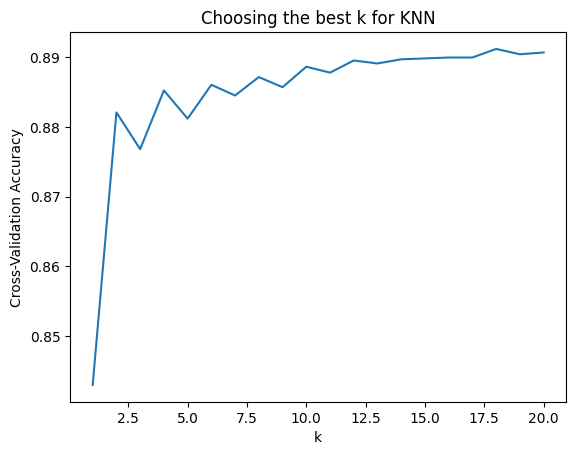

In [10]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
cross_val_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean() for k in k_values]

import matplotlib.pyplot as plt
plt.plot(k_values, cross_val_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Choosing the best k for KNN')
plt.show()

In [11]:
# Cross validation score

X = df.drop('y', axis=1)
y = df['y']

X_encoded = X.apply(LabelEncoder().fit_transform)
knn = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, X_encoded, y, cv=10)

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.87812872 0.87812872 0.61501788 0.86587183 0.79612519 0.23785395
 0.24023845 0.22622951 0.48614009 0.25812221]
Mean cross-validation score:  0.5481856549827787


In [12]:
print(y.value_counts())

y
0    29468
1     4085
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

X = df.drop('y', axis=1)
y = df['y']
X_encoded = X.apply(LabelEncoder().fit_transform)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
knn = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, X_scaled, y, cv=10)

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.87812872 0.87812872 0.85995232 0.87868852 0.87928465 0.87153502
 0.53919523 0.62444113 0.86974665 0.4119225 ]
Mean cross-validation score:  0.7691023484419213


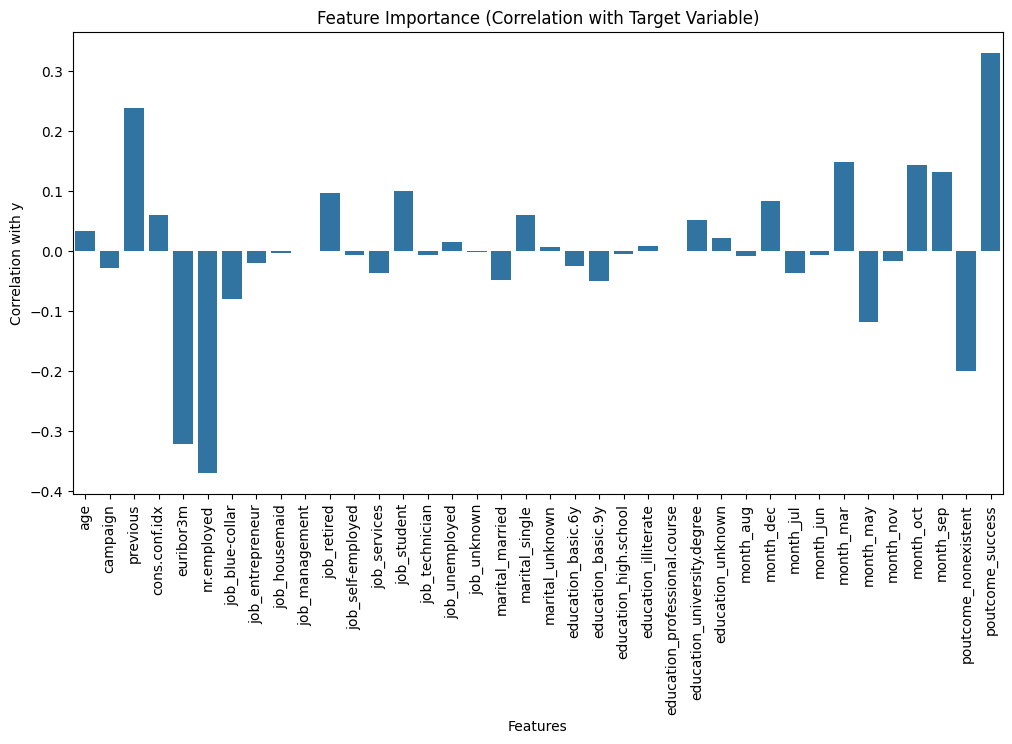

                          Feature  Correlation with y
0                             age            0.033978
1                        campaign           -0.028053
2                        previous            0.239017
3                   cons.conf.idx            0.060337
4                       euribor3m           -0.321970
5                     nr.employed           -0.370174
6                 job_blue-collar           -0.079337
7                job_entrepreneur           -0.019553
8                   job_housemaid           -0.003556
9                  job_management            0.000655
10                    job_retired            0.096500
11              job_self-employed           -0.005874
12                   job_services           -0.036978
13                    job_student            0.099944
14                 job_technician           -0.006198
15                 job_unemployed            0.016057
16                    job_unknown           -0.001965
17                marital_ma

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df_with_target = pd.concat([X, y], axis=1)

corr_matrix = df_with_target.corr()

target_corr = corr_matrix['y'].drop('y')

plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)
plt.title('Feature Importance (Correlation with Target Variable)')
plt.xlabel('Features')
plt.ylabel('Correlation with y')
plt.show()

feature_importance = pd.DataFrame({'Feature': target_corr.index, 'Correlation with y': target_corr.values})
print(feature_importance)